In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
sales=pd.read_csv('/Walmart_Sales.csv')
print(sales.columns)

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')


In [2]:
sales['Date']=pd.to_datetime(sales['Date'],dayfirst=True)
sales.dropna()
print(sales.nunique())

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64


Several Ways to Check normality: 1. Histogram   2. Q-Q plot    3. Test

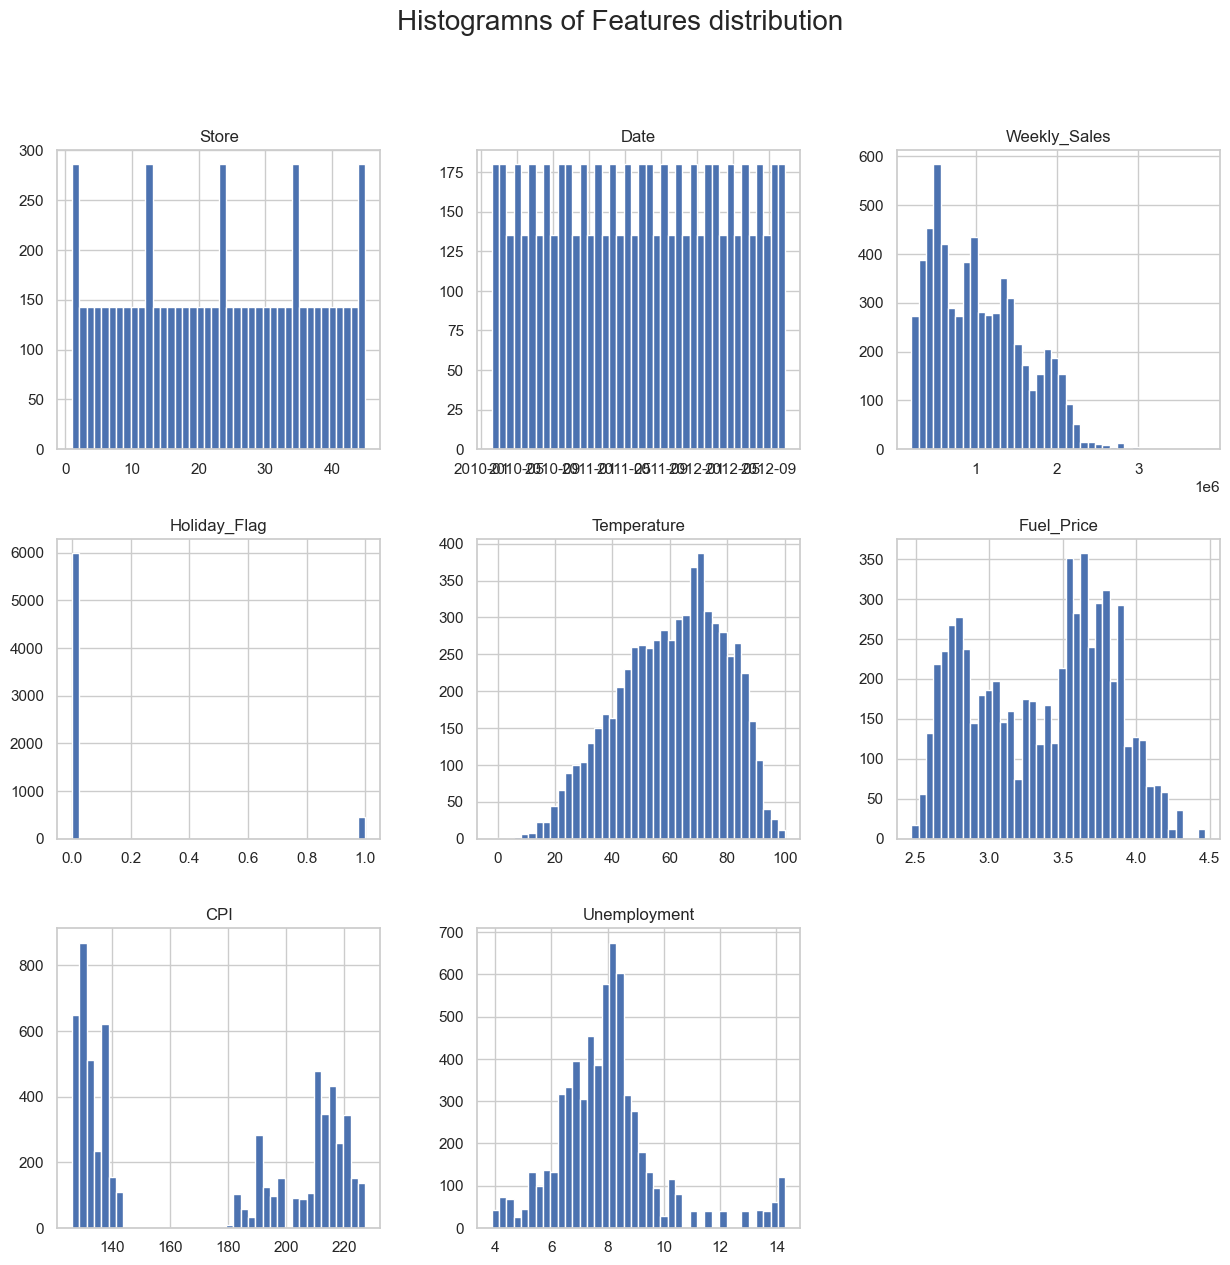

In [3]:
import seaborn as sns
sns.set(style='whitegrid')
sales.hist(bins=40,figsize=(15,14))
plt.suptitle('Histogramns of Features distribution',fontsize=20)
plt.show()


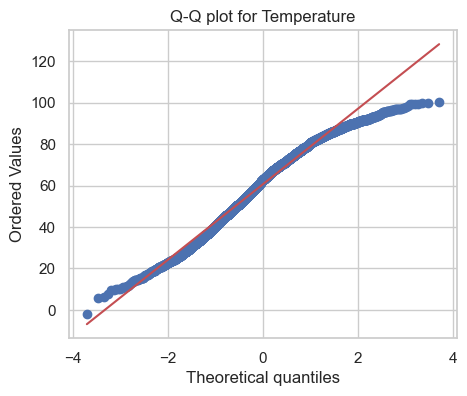

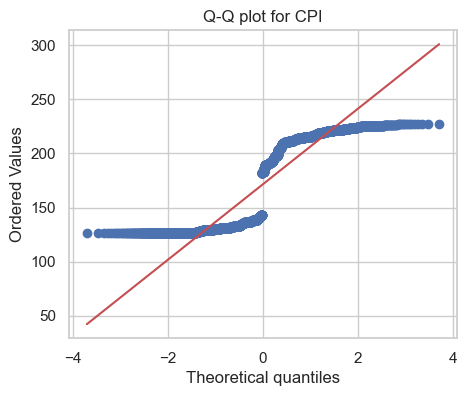

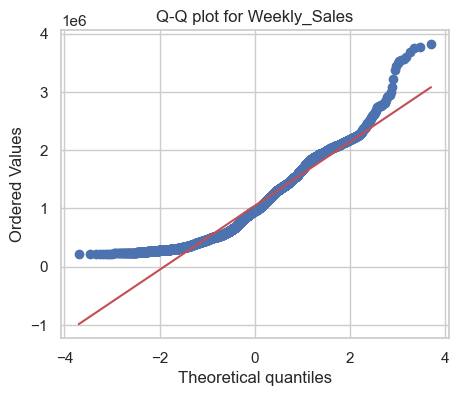

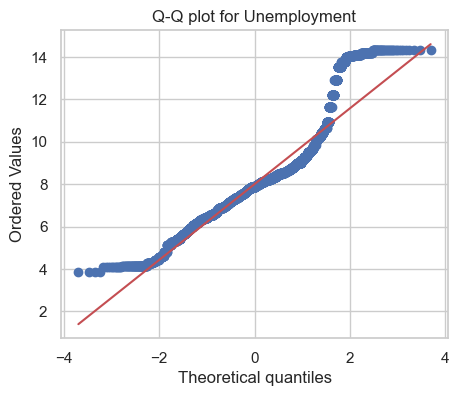

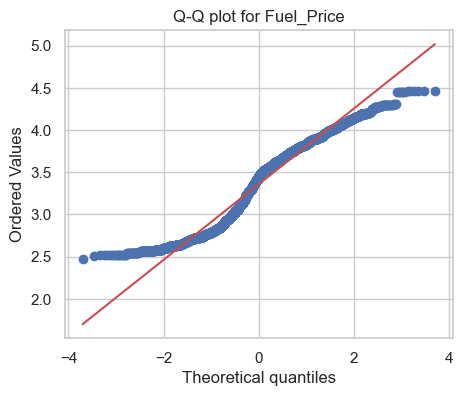

In [4]:
import scipy.stats as stats
def QQplot(data,title):
    plt.figure(figsize=(5, 4))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(title)
    plt.show()
for column in ['Temperature','CPI','Weekly_Sales','Unemployment','Fuel_Price']:
    QQplot(sales[column], f'Q-Q plot for {column}')

Then, make normality test

In [5]:
def test_normality(data):
    shaprio_stat,shaprio_p=stats.shapiro(data)
    ks_stat,ks_p=stats.kstest(data,'norm',args=(np.mean(data),np.std(data)))
    print("Shapiro-Wilk Test:")
    print(f"Statistic = {shaprio_stat:.4f}, p-value = {shaprio_p:.4f}")
    print("Kolmogorov-Smirnov Test:")
    print(f"Statistic = {ks_stat:.4f}, p-value = {ks_p:.4f}")
    
    if shaprio_p> 0.05 and ks_p > 0.05:
        print("Fail to reject null hypothesis: Data appears normal.\n")
    else:
        print("Reject null hypothesis: Data does not appear normal.\n")
for column in ['Temperature','CPI','Weekly_Sales','Unemployment','Fuel_Price']:
    print(f'Normality test for {column}')
    test_normality(sales[column])

Normality test for Temperature
Shapiro-Wilk Test:
Statistic = 0.9804, p-value = 0.0000
Kolmogorov-Smirnov Test:
Statistic = 0.0552, p-value = 0.0000
Reject null hypothesis: Data does not appear normal.

Normality test for CPI
Shapiro-Wilk Test:
Statistic = 0.7891, p-value = 0.0000
Kolmogorov-Smirnov Test:
Statistic = 0.2562, p-value = 0.0000
Reject null hypothesis: Data does not appear normal.

Normality test for Weekly_Sales
Shapiro-Wilk Test:
Statistic = 0.9471, p-value = 0.0000
Kolmogorov-Smirnov Test:
Statistic = 0.0824, p-value = 0.0000
Reject null hypothesis: Data does not appear normal.

Normality test for Unemployment
Shapiro-Wilk Test:
Statistic = 0.9028, p-value = 0.0000
Kolmogorov-Smirnov Test:
Statistic = 0.1336, p-value = 0.0000
Reject null hypothesis: Data does not appear normal.

Normality test for Fuel_Price
Shapiro-Wilk Test:
Statistic = 0.9532, p-value = 0.0000
Kolmogorov-Smirnov Test:
Statistic = 0.0968, p-value = 0.0000
Reject null hypothesis: Data does not appear n

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


First, check their skewness for variables(Numerical) 

In [6]:
numerical_columns=sales.select_dtypes(include=['int64','float64'])
for i in numerical_columns:
    skewness=numerical_columns[i].skew()
    print(f"Skewness of {i}: {skewness:.4f}")
    if skewness > 1:
        print(f"{i} is highly positively skewed.")
    elif skewness > 0.5:
        print(f"{i} is moderately positively skewed.")
    elif skewness < -1:
        print(f"{i} is highly negatively skewed.")
    elif skewness < -0.5:
        print(f"{i} is moderately negatively skewed.")
    else:
        print(f"{i} is approximately symmetric.")


Skewness of Store: 0.0000
Store is approximately symmetric.
Skewness of Weekly_Sales: 0.6684
Weekly_Sales is moderately positively skewed.
Skewness of Holiday_Flag: 3.3735
Holiday_Flag is highly positively skewed.
Skewness of Temperature: -0.3368
Temperature is approximately symmetric.
Skewness of Fuel_Price: -0.0962
Fuel_Price is approximately symmetric.
Skewness of CPI: 0.0635
CPI is approximately symmetric.
Skewness of Unemployment: 1.1881
Unemployment is highly positively skewed.


Now, CPI,Temperature and Fuel_Price need to use Z-score normalization. Weekly sales need to use Log transformation. 

In [7]:
data=sales.copy()
for i in ['CPI','Temperature','Fuel_Price']:
    data[i]=(data[i]-data[i].mean())/data[i].std()
data['Weekly_Sales']=np.log1p(data['Weekly_Sales'])

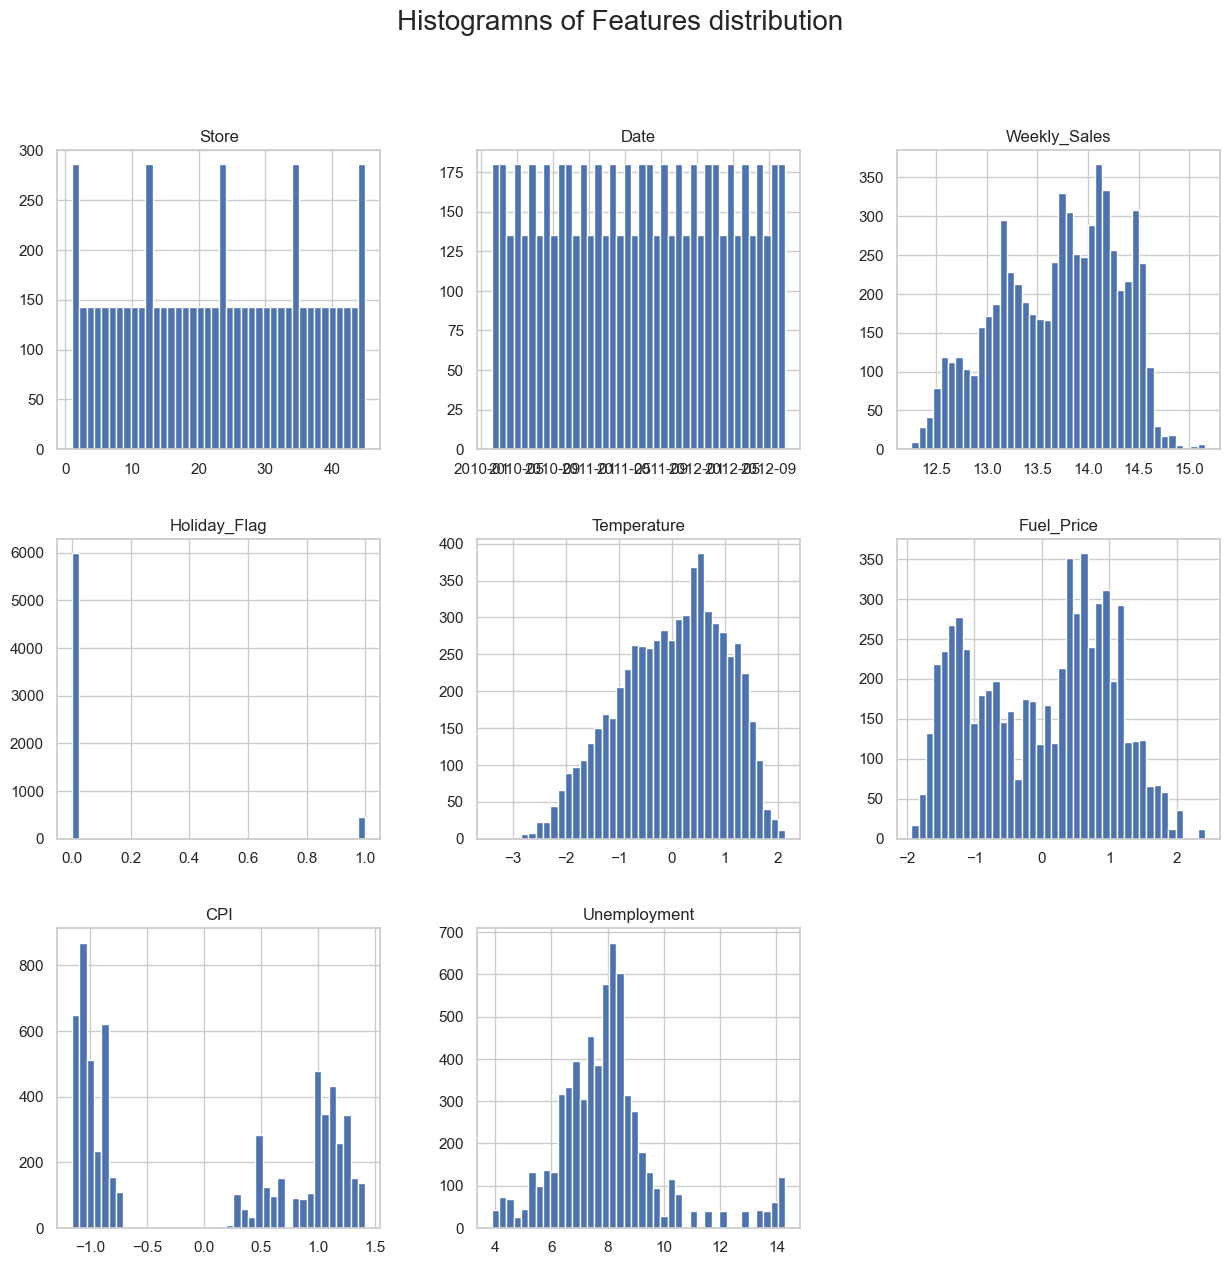

In [8]:
sns.set(style='whitegrid')
data.hist(bins=40,figsize=(15,14))
plt.suptitle('Histogramns of Features distribution',fontsize=20)
plt.show()


In [9]:
numerical_columns=data.select_dtypes(include=['int64','float64'])
for i in ['CPI','Fuel_Price','Temperature','Unemployment','Weekly_Sales']:
    skewness=numerical_columns[i].skew()
    print(f"Skewness of {i}: {skewness:.4f}")
    if skewness > 1:
        print(f"{i} is highly positively skewed.")
    elif skewness > 0.5:
        print(f"{i} is moderately positively skewed.")
    elif skewness < -1:
        print(f"{i} is highly negatively skewed.")
    elif skewness < -0.5:
        print(f"{i} is moderately negatively skewed.")
    else:
        print(f"{i} is approximately symmetric.")

Skewness of CPI: 0.0635
CPI is approximately symmetric.
Skewness of Fuel_Price: -0.0962
Fuel_Price is approximately symmetric.
Skewness of Temperature: -0.3368
Temperature is approximately symmetric.
Skewness of Unemployment: 1.1881
Unemployment is highly positively skewed.
Skewness of Weekly_Sales: -0.3056
Weekly_Sales is approximately symmetric.


So, the strategy need to be adjusted. 1.Try minmax() for CPI, Fuel_Price and Temperature. 2.Try box-cox for Unemployment. 3.Try square-root trans for Weekly sales

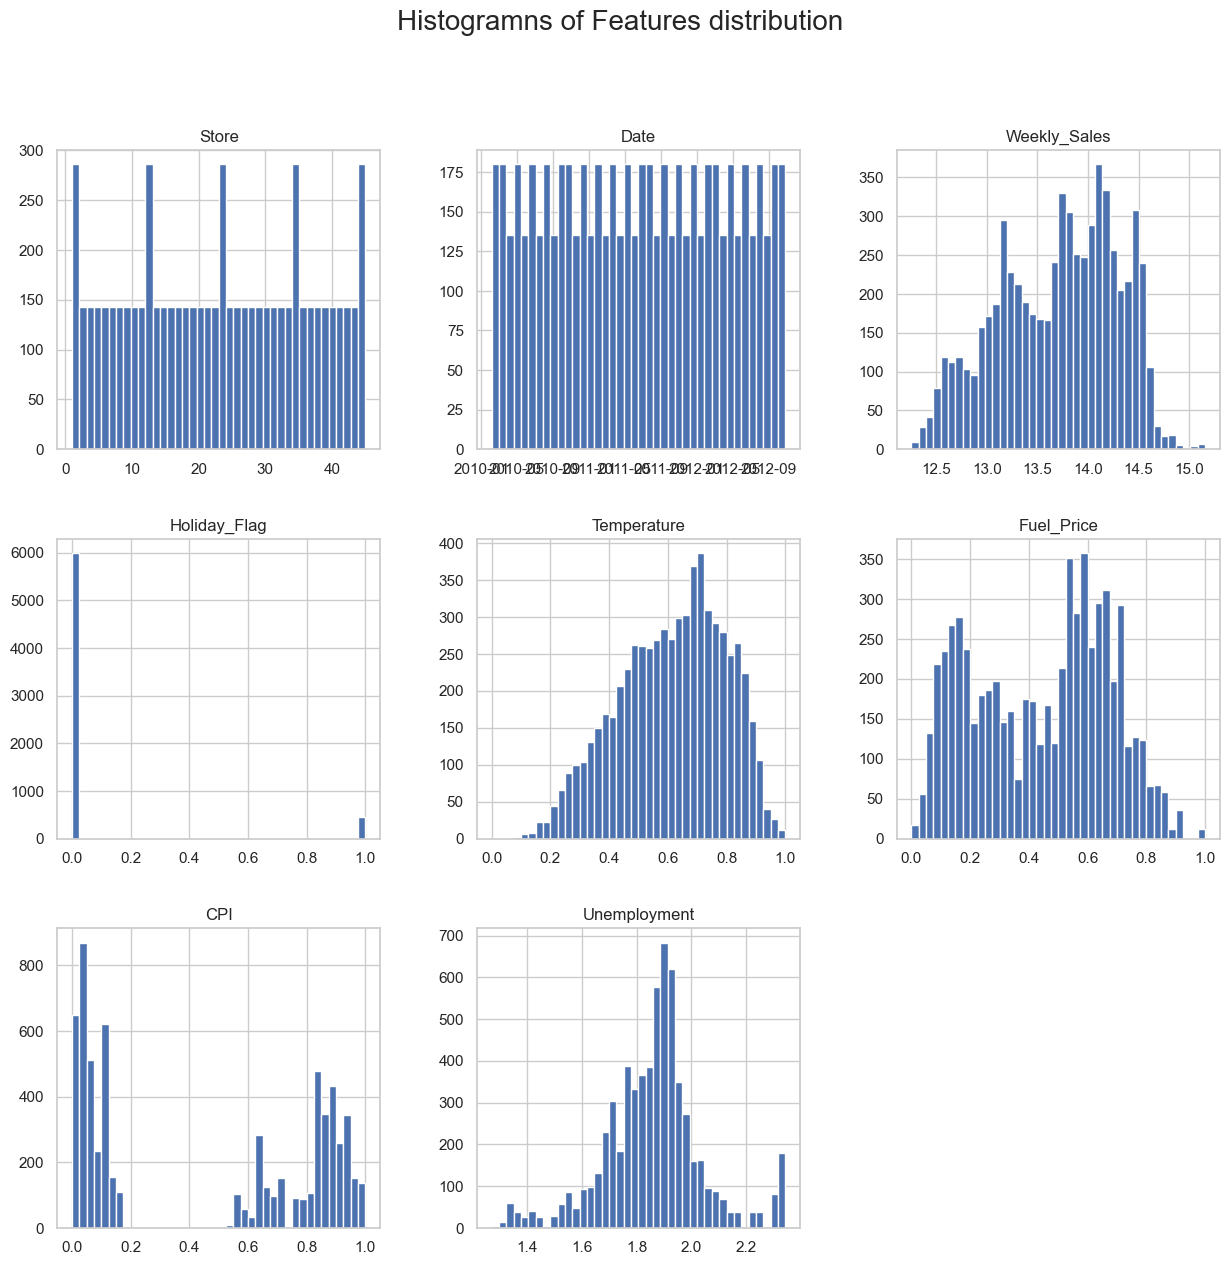

In [12]:
data1=sales.copy()
data1['Weekly_Sales']=np.log1p(data1['Weekly_Sales'])
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
for i in ['CPI','Temperature','Fuel_Price']:
    scaler=MinMaxScaler()
    data1[i] = scaler.fit_transform(data1[[i]])
data1['Unemployment'],_=boxcox(data1['Unemployment'])
sns.set(style='whitegrid')
data1.hist(bins=40,figsize=(15,14))
plt.suptitle('Histogramns of Features distribution',fontsize=20)
plt.show()

    


In [13]:
numerical_columns=data1.select_dtypes(include=['int64','float64'])
for i in ['CPI','Fuel_Price','Temperature','Unemployment','Weekly_Sales']:
    skewness=numerical_columns[i].skew()
    print(f"Skewness of {i}: {skewness:.4f}")
    if skewness > 1:
        print(f"{i} is highly positively skewed.")
    elif skewness > 0.5:
        print(f"{i} is moderately positively skewed.")
    elif skewness < -1:
        print(f"{i} is highly negatively skewed.")
    elif skewness < -0.5:
        print(f"{i} is moderately negatively skewed.")
    else:
        print(f"{i} is approximately symmetric.")

Skewness of CPI: 0.0635
CPI is approximately symmetric.
Skewness of Fuel_Price: -0.0962
Fuel_Price is approximately symmetric.
Skewness of Temperature: -0.3368
Temperature is approximately symmetric.
Skewness of Unemployment: -0.0096
Unemployment is approximately symmetric.
Skewness of Weekly_Sales: -0.3056
Weekly_Sales is approximately symmetric.


Since all the variables are similar to Gaussian distribution. Not more transformation is needed

In [14]:
for column in ['Temperature','CPI','Weekly_Sales','Unemployment','Fuel_Price']:
    print(f'Normality test for {column}')
    test_normality(data[column])


Normality test for Temperature
Shapiro-Wilk Test:
Statistic = 0.9804, p-value = 0.0000
Kolmogorov-Smirnov Test:
Statistic = 0.0552, p-value = 0.0000
Reject null hypothesis: Data does not appear normal.

Normality test for CPI
Shapiro-Wilk Test:
Statistic = 0.7891, p-value = 0.0000
Kolmogorov-Smirnov Test:
Statistic = 0.2562, p-value = 0.0000
Reject null hypothesis: Data does not appear normal.

Normality test for Weekly_Sales
Shapiro-Wilk Test:
Statistic = 0.9706, p-value = 0.0000
Kolmogorov-Smirnov Test:
Statistic = 0.0653, p-value = 0.0000
Reject null hypothesis: Data does not appear normal.

Normality test for Unemployment
Shapiro-Wilk Test:
Statistic = 0.9028, p-value = 0.0000
Kolmogorov-Smirnov Test:
Statistic = 0.1336, p-value = 0.0000
Reject null hypothesis: Data does not appear normal.

Normality test for Fuel_Price
Shapiro-Wilk Test:
Statistic = 0.9532, p-value = 0.0000
Kolmogorov-Smirnov Test:
Statistic = 0.0968, p-value = 0.0000
Reject null hypothesis: Data does not appear n

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Now, let's do some feature engineering staff. Normality will not be a problem unless we use linear regression(The residual must be normally distributed), if we use RandomForest,XGbooster we dont need to worry about it. 

Now, we can try to convert year into categorical data

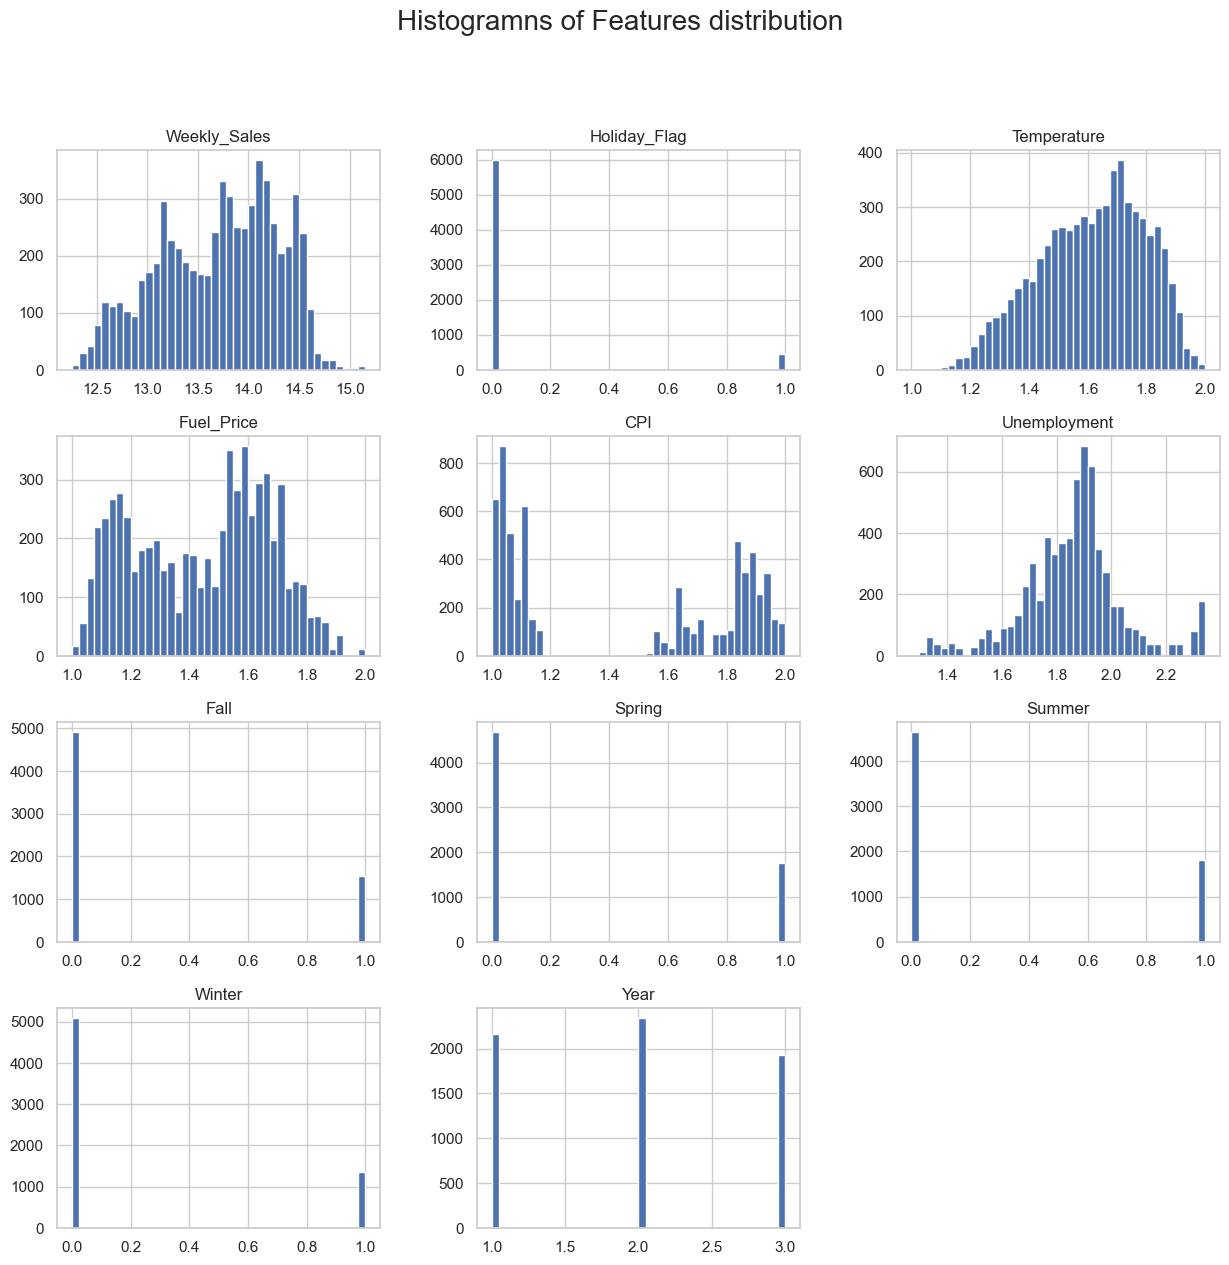

   Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price       CPI  \
0     14.312455             0     1.434149    1.050100  1.840500   
1     14.311400             1     1.396967    1.038076  1.841941   
2     14.292967             0     1.410861    1.021042  1.842405   
3     14.158908             0     1.476419    1.044589  1.842707   
4     14.256862             0     1.475147    1.076653  1.843008   

   Unemployment  Fall  Spring  Summer  Winter  Year  
0      1.892331     0       0       0       1     1  
1      1.892331     0       0       0       1     1  
2      1.892331     0       0       0       1     1  
3      1.892331     0       0       0       1     1  
4      1.892331     0       1       0       0     1  


In [49]:
data3 = sales.copy()
data3['Date'] = pd.to_datetime(data3['Date'], errors='coerce')
def classify_season(date):
    month = date.month
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'
data3['Season'] = data3['Date'].apply(classify_season)
season_dummies = pd.get_dummies(data3['Season'])
data3 = pd.concat([data3, season_dummies], axis=1)
data3.drop(columns=['Season'], inplace=True)
for col in data3.columns:
    if data3[col].dtype == 'bool':
        data3[col] = data3[col].astype(int)
data3['Year'] = data3['Date'].dt.year
def categorize_year(year):
    if year == 2010:
        return 1
    elif year == 2011:
        return 2
    elif year == 2012:
        return 3

data3['Year'] = data3['Year'].apply(categorize_year)
data3.dropna(subset=['Year'], inplace=True)
data3['Year'] = data3['Year'].astype(int)
data3.drop(columns=['Date'], inplace=True)
data3['Weekly_Sales']=np.log1p(data3['Weekly_Sales'])
data3.drop(columns=['Store'],inplace=True)
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
for i in ['CPI','Temperature','Fuel_Price']:
    scaler=MinMaxScaler()
    data3[i] = scaler.fit_transform(data3[[i]])+1
data3['Unemployment'],_=boxcox(data3['Unemployment'])
sns.set(style='whitegrid')
data3.hist(bins=40,figsize=(15,14))
plt.suptitle('Histogramns of Features distribution',fontsize=20)
plt.show()
print(data3.head())


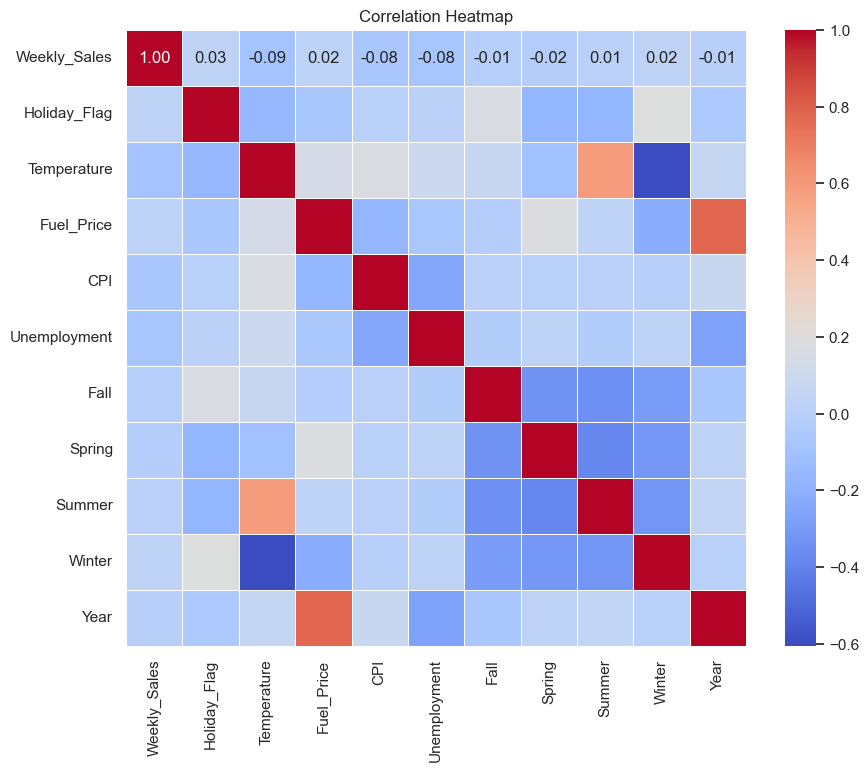

In [50]:
heatmap=data3.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,cbar=True)
plt.title('Correlation Heatmap')
plt.show()

Now, we can test these categorical variables

In [51]:
data3['Year'] = data3['Year'].astype('category')
from statsmodels.formula.api import ols
import statsmodels.api as sm
model=ols('Weekly_Sales~C(Year)',data=data3).fit()
anova_model=sm.stats.anova_lm(model,typ=2)
print(anova_model)

               sum_sq      df         F   PR(>F)
C(Year)      0.170276     2.0  0.245936  0.78198
Residual  2226.624091  6432.0       NaN      NaN


Since PR>0.05, There is not statistically significant relationship in weekly_sale and years. Then we take look at seasons


In [52]:
season_dummies = ['Spring', 'Summer', 'Fall', 'Winter','Holiday_Flag']
for season in season_dummies:
    model = ols(f'Weekly_Sales ~ {season}', data=data3).fit()
    anova_model = sm.stats.anova_lm(model, typ=2)
    print(f'ANOVA analysis for {season}:')
    print(anova_model)

ANOVA analysis for Spring:
               sum_sq      df         F    PR(>F)
Spring       0.662532     1.0  1.914563  0.166505
Residual  2226.131834  6433.0       NaN       NaN
ANOVA analysis for Summer:
               sum_sq      df        F    PR(>F)
Summer       0.134950     1.0  0.38988  0.532384
Residual  2226.659417  6433.0      NaN       NaN
ANOVA analysis for Fall:
               sum_sq      df        F    PR(>F)
Fall         0.423405     1.0  1.22341  0.268734
Residual  2226.370962  6433.0      NaN       NaN
ANOVA analysis for Winter:
               sum_sq      df         F    PR(>F)
Winter       1.358856     1.0  3.928006  0.047531
Residual  2225.435510  6433.0       NaN       NaN
ANOVA analysis for Holiday_Flag:
                   sum_sq      df         F    PR(>F)
Holiday_Flag     1.595821     1.0  4.613484  0.031759
Residual      2225.198546  6433.0       NaN       NaN


Therefore,Holiday and winter have statistically significant relationship between Weekly sales.Then, we first use these variables with other numerical values to build a model. 

Then, consider of using other non-linear regressors. RandomForest Can be a good choice with high robustness to avoid overfitting.

In [53]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=27)
rf.fit(X_train, y_train)
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(importances)
top_features = importances['Feature'].head(5).tolist()
print(f"Top Features Selected: {top_features}")

                             Feature  Importance
4                       Unemployment    0.352343
1                        Temperature    0.255879
3                                CPI    0.242839
2                         Fuel_Price    0.139553
5    Season_Holiday_Interaction_Fall    0.003633
0                       Holiday_Flag    0.003631
6  Season_Holiday_Interaction_Winter    0.002122
7  Season_Holiday_Interaction_Spring    0.000000
8  Season_Holiday_Interaction_Summer    0.000000
Top Features Selected: ['Unemployment', 'Temperature', 'CPI', 'Fuel_Price', 'Season_Holiday_Interaction_Fall']


First, Try RFE method: Recursive Feature Elimination(Iteratively removes the least important features and train the model) in Linear Regression

In [54]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X=data3.drop(columns=['Weekly_Sales','Year'])
y=data3['Weekly_Sales']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=27)


Number of Features: 1 - CV Mean RMSE: 0.5871
Number of Features: 2 - CV Mean RMSE: 0.5857
Number of Features: 3 - CV Mean RMSE: 0.5854
Number of Features: 4 - CV Mean RMSE: 0.5837
Number of Features: 5 - CV Mean RMSE: 0.5836
Number of Features: 6 - CV Mean RMSE: 0.5837
Number of Features: 7 - CV Mean RMSE: 0.5837
Number of Features: 8 - CV Mean RMSE: 0.5837
Number of Features: 9 - CV Mean RMSE: 0.5837

Best Number of Features: 5
Best CV RMSE: 0.5836
Selected Features: ['Temperature', 'CPI', 'Unemployment', 'Season_Holiday_Interaction_Fall', 'Season_Holiday_Interaction_Winter']
Final Test Set MSE: 0.3310
Final Test Set R^2 :0.018131265647835626
                             Feature  Coefficient
0                        Temperature    -0.292727
1                                CPI    -0.118220
2                       Unemployment    -0.298250
3    Season_Holiday_Interaction_Fall     0.118460
4  Season_Holiday_Interaction_Winter    -0.074880


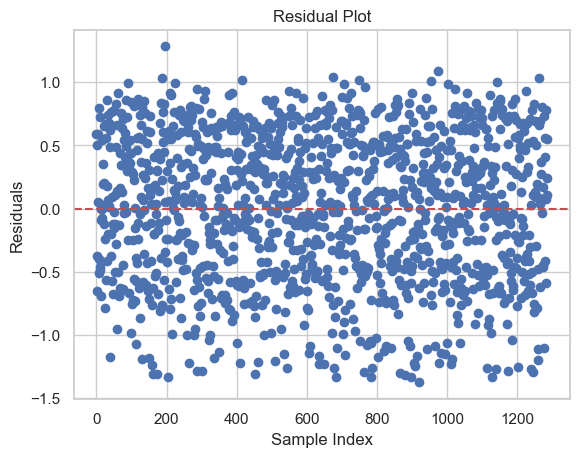

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

alpha = 1.0  ==
model = Ridge(alpha=alpha)

best_num_features = 0
best_score = float('inf')
best_features = []
cv = 5

for num in range(1, len(X_train.columns) + 1):
    rfe = RFE(estimator=model, n_features_to_select=num)
    rfe.fit(X_train, y_train)
    selected_features = X_train.columns[rfe.support_]
    X_train_rfe = rfe.transform(X_train)
    X_test_rfe = rfe.transform(X_test)
    
    cv_scores = cross_val_score(model, X_train_rfe, y_train, cv=cv, scoring='neg_mean_squared_error')
    mean_cv_rmse = np.sqrt(-cv_scores.mean())
    
    print(f"Number of Features: {num} - CV Mean RMSE: {mean_cv_rmse:.4f}")
    if mean_cv_rmse < best_score:
        best_num_features = num
        best_score = mean_cv_rmse
        best_features = selected_features

rfe_final = RFE(estimator=model, n_features_to_select=best_num_features)
rfe_final.fit(X_train, y_train)
X_train_final = rfe_final.transform(X_train)
X_test_final = rfe_final.transform(X_test)

model.fit(X_train_final, y_train)
predictions = model.predict(X_test_final)  # Use the transformed test set for predictions
r2=r2_score(y_test,predictions)
# Calculate residuals and metrics
residuals = y_test - predictions
final_test_mse = mean_squared_error(y_test, predictions)

# Display results
print(f"\nBest Number of Features: {best_num_features}")
print(f"Best CV RMSE: {best_score:.4f}")
print(f"Selected Features: {list(best_features)}")
print(f"Final Test Set MSE: {final_test_mse:.4f}")
print(f'Final Test Set R^2 :{r2}')
# Map coefficients back to feature names
coefficients = pd.DataFrame({
    'Feature': list(best_features),
    'Coefficient': model.coef_
})
print(coefficients)

# Plot residuals
plt.scatter(range(len(residuals)), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Sample Index")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

The residuals are not normally distributed. Test MSE is 0.3310. Also, there is a conflict between RandomForest analysis on feature importance.

Then, use basic Gradient Boosting to see if non-linear will have better performance, which helps maximize accuracy by fine tuning.

Gradient Boosting Test Set MSE: 0.2563
        Feature  Importance
4  Unemployment    0.565600
3           CPI    0.261179
1   Temperature    0.112611
2    Fuel_Price    0.036408
7        Summer    0.010334
8        Winter    0.009475
6        Spring    0.002213
5          Fall    0.001531
0  Holiday_Flag    0.000649


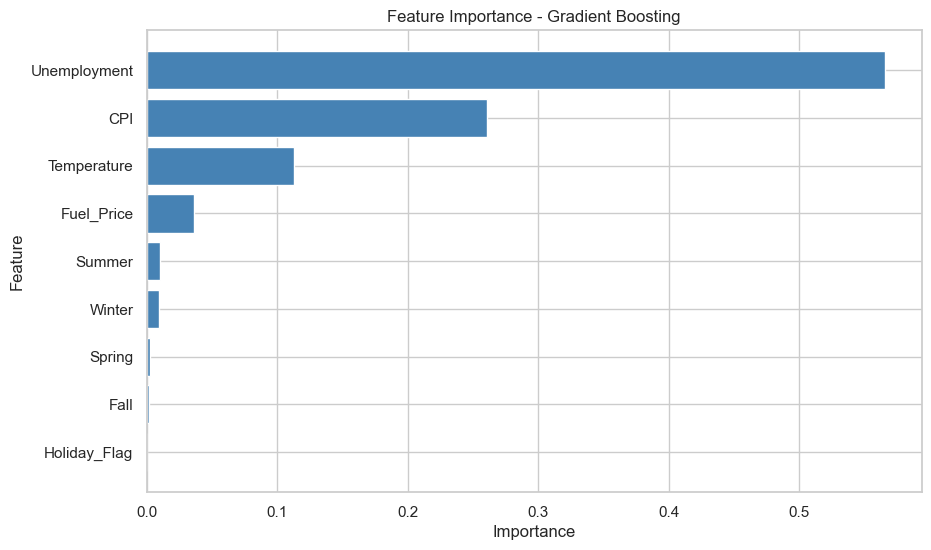

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
gbr_model = GradientBoostingRegressor(random_state=27)
gbr_model.fit(X_train, y_train)
y_pred = gbr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Gradient Boosting Test Set MSE: {mse:.4f}")
feature_importances = gbr_model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print(importance_df)
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='steelblue')
plt.gca().invert_yaxis()
plt.title('Feature Importance - Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

However, we at least should include some categorical variables in the regression model. We can combine these categorical variables to improve the accuracy further more. First, interact Fall with holiday

In [57]:
seasons = ['Fall', 'Winter', 'Spring', 'Summer']
for season in seasons:
    interaction_column = f'Season_Holiday_Interaction_{season}'
    X_train[interaction_column] = X_train[season] * X_train['Holiday_Flag']
    X_test[interaction_column] = X_test[season] * X_test['Holiday_Flag']
for season in seasons:
    X_train = X_train.drop(columns=[f'{season}'])
    X_test = X_test.drop(columns=[f'{season}'])
print(X_train.columns)

Index(['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'Season_Holiday_Interaction_Fall', 'Season_Holiday_Interaction_Winter',
       'Season_Holiday_Interaction_Spring',
       'Season_Holiday_Interaction_Summer'],
      dtype='object')


In [58]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(feature_importance)

                             Feature  Importance
4                       Unemployment    0.544016
3                                CPI    0.293990
1                        Temperature    0.100315
2                         Fuel_Price    0.055253
5    Season_Holiday_Interaction_Fall    0.004957
6  Season_Holiday_Interaction_Winter    0.001470
0                       Holiday_Flag    0.000000
7  Season_Holiday_Interaction_Spring    0.000000
8  Season_Holiday_Interaction_Summer    0.000000


In [59]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validation MSE: {-scores.mean():.4f}")


Cross-Validation MSE: 0.2711


Then We use grid research to fine tune hypothesis

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test MSE: {mse:.4f}")
print(f"Test R²: {r2:.4f}")

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
Test MSE: 0.2129
Test R²: 0.3685


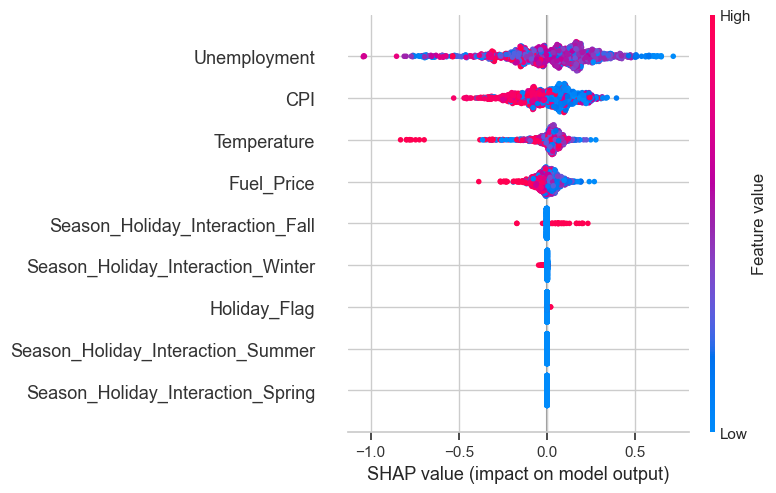

In [69]:
explainer = shap.Explainer(best_model, X_train)  
shap_values = explainer(X_test)  

shap.summary_plot(shap_values, X_test, plot_type="dot")

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
from itertools import combinations
import numpy as np
important_features = ['Unemployment', 'CPI', 'Temperature', 'Fuel_Price', 'Season_Holiday_Interaction_Fall']
best_combination = None
best_mse = float('inf')
best_r2 = 0
for i in range(1, len(important_features) + 1):
    for combination in combinations(important_features, i):
        X_train_comb = X_train[list(combination)]
        X_test_comb = X_test[list(combination)]
        model = GradientBoostingRegressor(
            learning_rate=0.1,  
            max_depth=5,       
            n_estimators=200, 
            min_samples_split=10,
            random_state=27
        )
        
        model.fit(X_train_comb, y_train)
        cv_mse = -cross_val_score(model, X_train_comb, y_train, cv=5, scoring='neg_mean_squared_error').mean()
        cv_r2 = cross_val_score(model, X_train_comb, y_train, cv=5, scoring='r2').mean()
        y_pred = model.predict(X_test_comb)
        test_mse = mean_squared_error(y_test, y_pred)
        test_r2 = r2_score(y_test, y_pred)
        print(f"Combination: {combination}, CV MSE: {cv_mse:.4f}, CV R^2: {cv_r2:.4f}, Test MSE: {test_mse:.4f}, Test R^2: {test_r2:.4f}")
        if test_mse < best_mse:
            best_combination = combination
            best_mse = test_mse
            best_r2 = test_r2
print("\nBest Feature Combination:")
print(f"Features: {best_combination}")
print(f"Test MSE: {best_mse:.4f}, Test R^2: {best_r2:.4f}")

Combination: ('Unemployment',), CV MSE: 0.1833, CV R^2: 0.4728, Test MSE: 0.1795, Test R^2: 0.4674
Combination: ('CPI',), CV MSE: 0.3797, CV R^2: -0.0906, Test MSE: 0.3597, Test R^2: -0.0671
Combination: ('Temperature',), CV MSE: 0.3738, CV R^2: -0.0742, Test MSE: 0.3619, Test R^2: -0.0735
Combination: ('Fuel_Price',), CV MSE: 0.3798, CV R^2: -0.0909, Test MSE: 0.3660, Test R^2: -0.0857
Combination: ('Season_Holiday_Interaction_Fall',), CV MSE: 0.3481, CV R^2: -0.0002, Test MSE: 0.3360, Test R^2: 0.0034
Combination: ('Unemployment', 'CPI'), CV MSE: 0.2125, CV R^2: 0.3890, Test MSE: 0.2003, Test R^2: 0.4058
Combination: ('Unemployment', 'Temperature'), CV MSE: 0.2226, CV R^2: 0.3598, Test MSE: 0.2093, Test R^2: 0.3791
Combination: ('Unemployment', 'Fuel_Price'), CV MSE: 0.2164, CV R^2: 0.3778, Test MSE: 0.2038, Test R^2: 0.3955
Combination: ('Unemployment', 'Season_Holiday_Interaction_Fall'), CV MSE: 0.1911, CV R^2: 0.4505, Test MSE: 0.1849, Test R^2: 0.4515
Combination: ('CPI', 'Temper

MSE is quite good whereas R^2 score is not satisfactory. We can try alternative models. Like XGBRegressor. Also, only one Feature seems a little bit werid.

In [91]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=42)

param_dist = {
    'n_estimators': [200,300,350],
    'learning_rate': [0.15,0.2],
    'max_depth': [4, 5, 6],
    'subsample': [0.6,0.8,1],
    'colsample_bytree': [0.6,0.8],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 10, 100]   
}
xgb_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_dist,
    scoring='neg_mean_squared_error',  
    cv=5,                             
    verbose=2,                        
    n_jobs=-1                        
)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Test MSE: {mse:.4f}")
print(f"Test R²: {r2:.4f}")

Fitting 5 folds for each of 972 candidates, totalling 4860 fits
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=4, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=4, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=4, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=4, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=4, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=4, n_estimators=200, reg_alpha=0, reg_lambda=1, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.6, learning_rate=0.15, max_depth=4, n_estimators=2

Best Parameters: {'subsample': 1, 'n_estimators': 350, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 1.0}


In [80]:
final_model = XGBRegressor(
    n_estimators=350,
    learning_rate=0.2,
    max_depth=3,
    subsample=1.0,
    colsample_bytree=1,
    random_state=42
)
final_model.fit(X_train, y_train)

# Make predictions
y_pred_train = final_model.predict(X_train)
y_pred_test = final_model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Test R²: {test_r2:.4f}")

Train MSE: 0.1548
Test MSE: 0.2143
Test R²: 0.3642


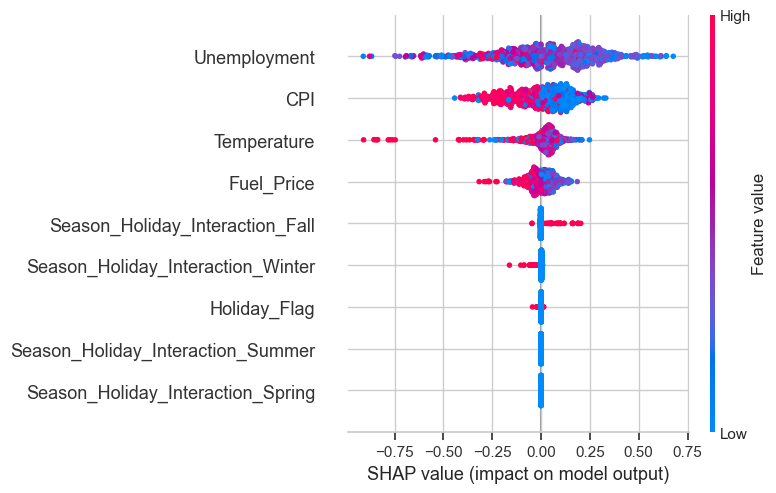

In [38]:
import shap
explainer = shap.Explainer(final_model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

In [76]:
from itertools import combinations
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import numpy as np
important_features = ['Unemployment', 'CPI', 'Temperature', 'Fuel_Price', 'Season_Holiday_Interaction_Fall']
best_combination = None
best_mse = float('inf')
best_r2 = -float('inf')
best_params = grid_search.best_params_
if "min_samples_split" in best_params:
    del best_params["min_samples_split"]
for i in range(1, len(important_features) + 1):
    for combo in combinations(important_features, i):
        X_train_subset = X_train[list(combo)]
        X_test_subset = X_test[list(combo)]
        
        model = XGBRegressor(**grid_search.best_params_)
        model.fit(X_train_subset, y_train)
        y_pred = model.predict(X_test_subset)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"Combination: {combo}, MSE: {mse:.4f}, R^2: {r2:.4f}")
        
        if mse < best_mse or (mse == best_mse and r2 > best_r2):
            best_mse = mse
            best_r2 = r2
            best_combination = combo

print("\nBest Feature Combination:")
print(f"Features: {best_combination}")
print(f"Test MSE: {best_mse:.4f}, Test R^2: {best_r2:.4f}")

Combination: ('Unemployment',), MSE: 0.2469, R^2: 0.2675
Combination: ('CPI',), MSE: 0.3354, R^2: 0.0052
Combination: ('Temperature',), MSE: 0.3433, R^2: -0.0184
Combination: ('Fuel_Price',), MSE: 0.3473, R^2: -0.0302
Combination: ('Season_Holiday_Interaction_Fall',), MSE: 0.3360, R^2: 0.0034
Combination: ('Unemployment', 'CPI'), MSE: 0.1920, R^2: 0.4304
Combination: ('Unemployment', 'Temperature'), MSE: 0.2343, R^2: 0.3051
Combination: ('Unemployment', 'Fuel_Price'), MSE: 0.2424, R^2: 0.2810
Combination: ('Unemployment', 'Season_Holiday_Interaction_Fall'), MSE: 0.2521, R^2: 0.2522
Combination: ('CPI', 'Temperature'), MSE: 0.3499, R^2: -0.0381
Combination: ('CPI', 'Fuel_Price'), MSE: 0.3638, R^2: -0.0791
Combination: ('CPI', 'Season_Holiday_Interaction_Fall'), MSE: 0.3356, R^2: 0.0044
Combination: ('Temperature', 'Fuel_Price'), MSE: 0.3674, R^2: -0.0899
Combination: ('Temperature', 'Season_Holiday_Interaction_Fall'), MSE: 0.3438, R^2: -0.0198
Combination: ('Fuel_Price', 'Season_Holiday

Finally, We can try neural network stack.

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 253us/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 198us/step
Final Stacked Model MSE: 0.2683
Final R^2 score is 0.20428551544879037
